# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Michigan State in Olympics
## Question to be analyzed

How does Michigan compares with other states in having number of olympians from both winter and summer games?

## Import the libraries

In [83]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


## Load and clean up the data

 - USA Olympic Medal Counts by  Year.xlsx - Has the medal counts for USA for all teh summer and winter olympic games
 - Olympians from Michigan.xlsx - Has the details of all the atheletics from Michigan state who won an olympic medal either in the summer or winter games
 - USA Olympic Medals by Sport.xlsx - has the details of all the olympic medals won by USA in summer and winter games splited by year



In [84]:
# Load and clean up USA medal count data

# USA medal counts for summer games
USA_summer = pd.read_excel('USA Olympic Medal Counts by  Year.xlsx', sheetname = 'Summer', skipfooter = 4)
USA_summer['Year'] = USA_summer['Games'].str.extract('(\d{4})')
USA_summer.set_index('Year',inplace=True)
#print(USA_summer)

# USA medal count for winter games
USA_winter = pd.read_excel('USA Olympic Medal Counts by  Year.xlsx', sheetname = 'Winter', skipfooter = 2)
USA_winter['Year'] = USA_winter['Games'].str.extract('(\d{4})')
USA_winter.set_index('Year',inplace=True)
#print(USA_winter)

# Load and clean up Michigan olympians data

MI_olympians = pd.read_excel('Olympians from Michigan.xlsx')
MI_olympians['Year'],MI_olympians['Olympics'] = MI_olympians['Olympics'].str.split(' ',1).str
MI_olympians.set_index('Year',inplace=True)

# Michigan olympians from summer games
MI_olympians_sum = MI_olympians[MI_olympians['Olympics']=='Summer Olympics']
#print(MI_olympians_sum)

# Michigan Olympians from winter games
MI_olympians_win = MI_olympians[MI_olympians['Olympics']=='Winter Olympics']
#print(MI_olympians_win)

# Load and clean up the data for USA medal by sports

# USA medal by summer sports 
USA_sport_summer = pd.read_excel('USA Olympic Medals by Sport.xlsx', sheetname = 0, skipfooter = 1)
USA_sport_summer['Sport'] = USA_sport_summer['Sport'].str.strip()


# List od sports which are part of athletics
Athletics = ['Sprint', 'Relay', 'Hurdles', 'Jump', 'Throw','Pentathlon', 'Heptathlon','Decathlon','Shot Put', 'Steeplechase', 'Men']

# Match up the sport name between USA summer sport and Michigan data
for index, event in MI_olympians_sum['Event'].iteritems():
    for sport in USA_sport_summer['Sport']:
        if sport.lower() in event.lower():
            MI_olympians_sum.loc[MI_olympians_sum.Event == event, 'Event'] = sport
    for ath in Athletics:
         if ath.lower() in event.lower():
            MI_olympians_sum.loc[MI_olympians_sum.Event == event, 'Event'] = 'Athletics'
            
MI_olympians_sum.loc[(MI_olympians_sum['Event'].str.contains('Breaststroke'), 'Event')] = 'Swimming'
MI_olympians_sum.loc[(MI_olympians_sum['Event'].str.contains('Soccer'), 'Event')] = 'Football'
#print(MI_olympians_sum)

# USA medal by winter sports 
USA_sport_winter = pd.read_excel('USA Olympic Medals by Sport.xlsx', sheetname = 'Winter', skipfooter = 1)
USA_sport_winter['Sport'] = USA_sport_winter['Sport'].str.strip()


# Match up the sport name between USA_winter sport and Michigan data
for index, event in MI_olympians_win['Event'].iteritems():
    for sport in USA_sport_winter['Sport']:
        if sport.lower() in event.lower():
            MI_olympians_win.loc[MI_olympians_win.Event == event, 'Event'] = sport
            
MI_olympians_win.loc[(MI_olympians_win['Event'].str.contains('Slalom'), 'Event')] = 'Alpine skiing'
MI_olympians_win.loc[(MI_olympians_win['Event'].str.contains('Relay'), 'Event')] = 'Speed skating'
MI_olympians_win.loc[(MI_olympians_win['Event'].str.contains('Dancing'), 'Event')] = 'Figure skating'
#print(MI_olympians_win)



/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
/opt/conda/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats

In [85]:
# Find the average medal count for the states by dividing the total medal counts by 50.

# Set the index for USA summer and winter medal totals
USA_sport_summer.set_index('Sport', inplace=True)
USA_sport_winter.set_index('Sport', inplace=True)

# Sort the dataframe based on the index values to match with the MI dataframes
USA_sport_summer.sort_index(inplace=True)
USA_sport_winter.sort_index(inplace=True)

# Drop the unwanted columns form the dataframes
USA_sport_winter.drop(['Total','Rank'],axis=1,inplace=True)
USA_sport_summer.drop(['Total','Rank'],axis=1,inplace=True)

# Find the average medal count for a USA state in the summer games
USA_sport_summer_avg = USA_sport_summer.copy()
USA_sport_summer_avg['Gold'] = USA_sport_summer['Gold']/50 
USA_sport_summer_avg['Silver'] = USA_sport_summer['Silver']/50 
USA_sport_summer_avg['Bronze'] = USA_sport_summer['Bronze']/50 
#print(USA_sport_summer_avg)

# Find the average medal count for a USA state in the winter games
USA_sport_winter_avg = USA_sport_winter.copy()
USA_sport_winter_avg['Gold'] = USA_sport_winter['Gold']/50 
USA_sport_winter_avg['Silver'] = USA_sport_winter['Silver']/50 
USA_sport_winter_avg['Bronze'] = USA_sport_winter['Bronze']/50 
#print(USA_sport_winter_avg)

# Clean up the michigan olympian data further

# Group the Michigan olymipans by summer sport
MI_sumoly_sport = MI_olympians_sum.groupby(['Event', 'Medal'])['Name'].count()

# Group the Michigan olymipans by summer game year
MI_sumoly_year = MI_olympians_sum.groupby([MI_olympians_sum.index.get_level_values(0), 'Medal'])['Name'].count()

# Group the Michigan olymipans by winter sport
MI_winoly_sport = MI_olympians_win.groupby(['Event', 'Medal'])['Name'].count()

# Group the Michigan olymipans by winter game year
MI_winoly_year = MI_olympians_win.groupby([MI_olympians_win.index.get_level_values(0), 'Medal'])['Name'].count()
#print(MI_winoly_year)


In [86]:
# Find the average medal count for the states by dividing the total medal counts by 50.

# Drop the unwanted columns and row form the dataframes
USA_year_summer= USA_summer.drop(['Games','Athletes','Total','Gold medals', 'Overall medals'],axis=1,inplace=False)
USA_year_summer.drop(['1980','1896','1900','1904'], inplace=True)
USA_year_winter= USA_winter.drop(['Games','Athletes','Total','Gold medals', 'Overall medals'],axis=1,inplace=False)

# Find the average medal count for a USA state in an olympic year for summer games
USA_year_summer_avg=USA_year_summer.copy()
USA_year_summer_avg['Gold'] = USA_year_summer['Gold']/50 
USA_year_summer_avg['Silver'] = USA_year_summer['Silver']/50 
USA_year_summer_avg['Bronze'] = USA_year_summer['Bronze']/50 
#print(USA_sport_summer_avg)

# Find the average medal count for a USA state in an olympic year for winter games
USA_year_winter_avg=USA_year_winter.copy()
USA_year_winter_avg['Gold'] = USA_year_winter['Gold']/50 
USA_year_winter_avg['Silver'] = USA_year_winter['Silver']/50 
USA_year_winter_avg['Bronze'] = USA_year_winter['Bronze']/50 
#print(USA_sport_winter_avg)

# Match up the sport rows in both MI and USA datasets. Fill-in zero value for the unmatched rows
MI_sumoly_sport_full = MI_sumoly_sport.unstack().add(USA_sport_summer_avg, fill_value=0).subtract(USA_sport_summer_avg)
#print(MI_sumoly_sport_full)
MI_winoly_sport_full = MI_winoly_sport.unstack().add(USA_sport_winter_avg, fill_value=0).subtract(USA_sport_winter_avg)
#print(MI_winoly_sport_full)
#MI_sumoly_year_full = MI_sumoly_year.unstack().add(USA_year_summer_avg, fill_value=0).subtract(USA_year_summer_avg)
MI_winoly_year_full = MI_winoly_year.unstack().add(USA_year_winter_avg, fill_value=0).subtract(USA_year_winter_avg)



# Create the plots to understand the data

### Figure 1: To Visualize the MI's Medal Counts from Summer Olympics by Games

<IPython.core.display.Javascript object>


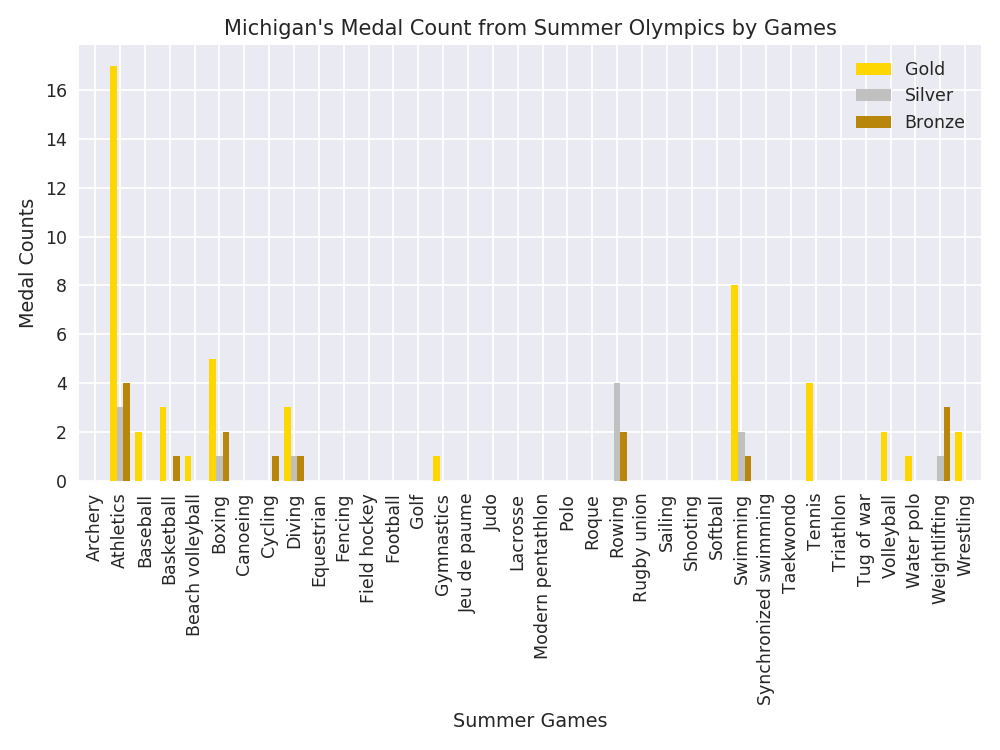

In [87]:
# Create Figure to visualize the MI's medal counts from Summer Olympics
fig1 = plt.figure(figsize = (8,6))
plt.subplot(111)
#plt.style.available
plt.style.use('seaborn')

In [88]:
plt.clf()

MI_sumoly_sport_full.plot(y =['Gold','Silver', 'Bronze'],kind='bar', ax= plt.gca(),width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.xticks(rotation=90)
plt.xlabel('Summer Games')
plt.ylabel('Medal Counts')
plt.title('Michigan\'s Medal Count from Summer Olympics by Games')
fig1.tight_layout()

### Figure 2: To Visualize the MI's Medal Counts from Winter Olympics by Games

<IPython.core.display.Javascript object>


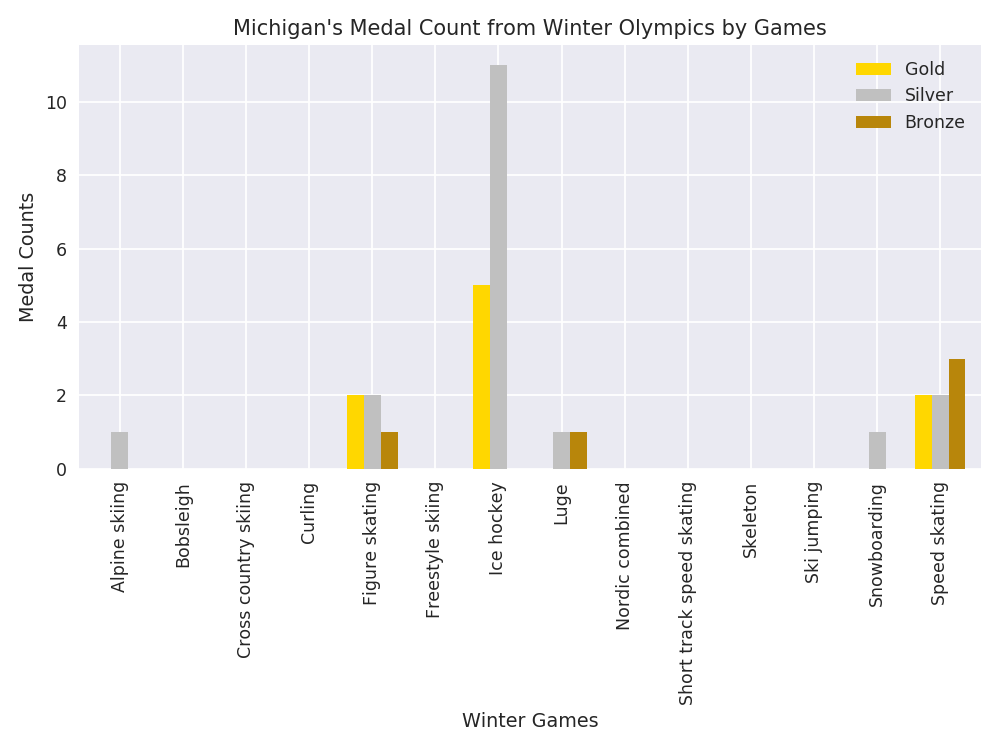

In [89]:
# Create Figure to visualize the MI's medal counts from Winter Olympics
fig2 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [90]:
plt.clf()

MI_winoly_sport_full.plot(y =['Gold','Silver', 'Bronze'],kind='bar', ax= plt.gca(),width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.xticks(rotation=90)
plt.xlabel('Winter Games')
plt.ylabel('Medal Counts')
plt.title('Michigan\'s Medal Count from Winter Olympics by Games')
fig2.tight_layout()

### Figure 3: To Visualize the MI's Medal Counts from Summer Olympics by Year

<IPython.core.display.Javascript object>


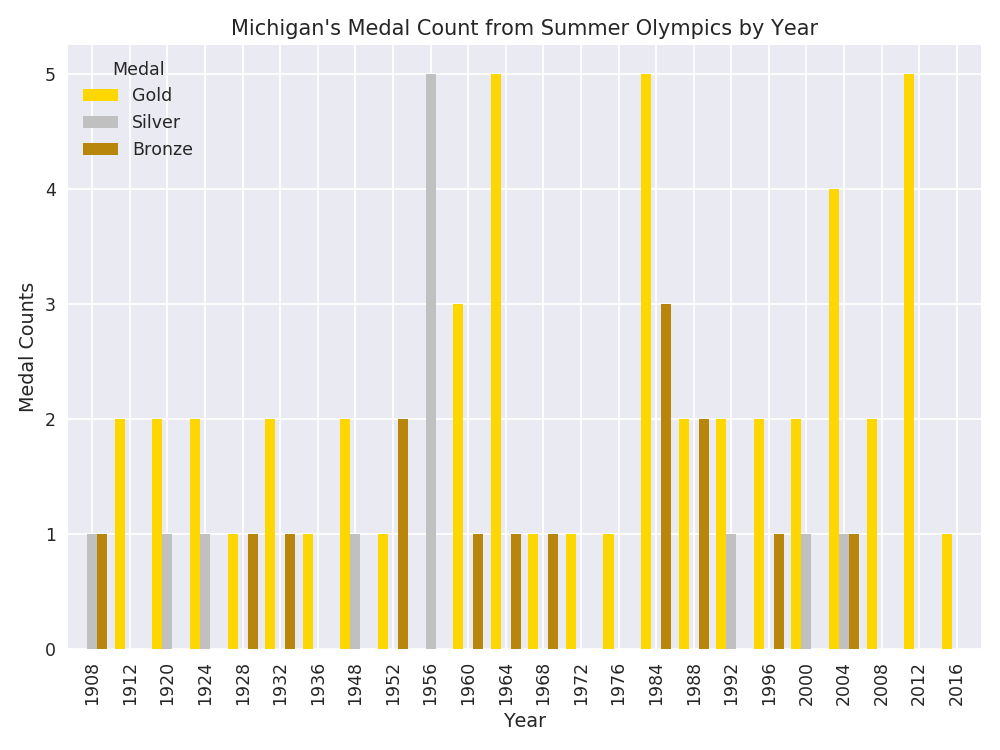

In [91]:
# Create Figure to visualize the MI's medal counts from Winter Olympics
fig3 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [92]:
plt.clf()

MI_sumoly_year.reindex(['Gold', 'Silver', 'Bronze'], level='Medal').unstack().plot(kind='bar', ax= plt.gca(),
                                                                  width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Medal Counts')
plt.title('Michigan\'s Medal Count from Summer Olympics by Year')
fig3.tight_layout()

### Figure 4: To Visualize the MI's Medal Counts from Winter Olympics by Year

<IPython.core.display.Javascript object>


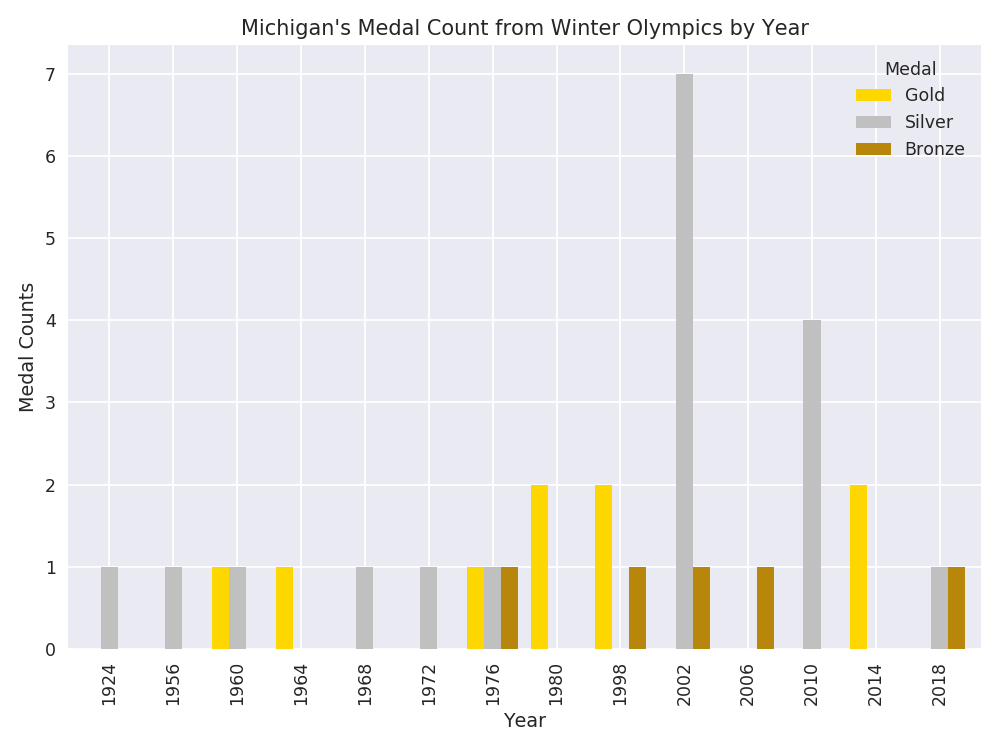

In [93]:
# Create Figure to visualize the MI's medal counts from Winter Olympics
fig4 = plt.figure(figsize = (8, 6))
plt.subplot(111)
plt.style.use('seaborn')

In [94]:
plt.clf()

MI_winoly_year.reindex(['Gold', 'Silver', 'Bronze'], level='Medal').unstack().plot(kind='bar', ax= plt.gca(),
                                                                  width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Medal Counts')
plt.title('Michigan\'s Medal Count from Winter Olympics by Year')
fig4.tight_layout()

### Figure 5: To Visualize the USA Medal Counts from Summer Olympics by Year

<IPython.core.display.Javascript object>


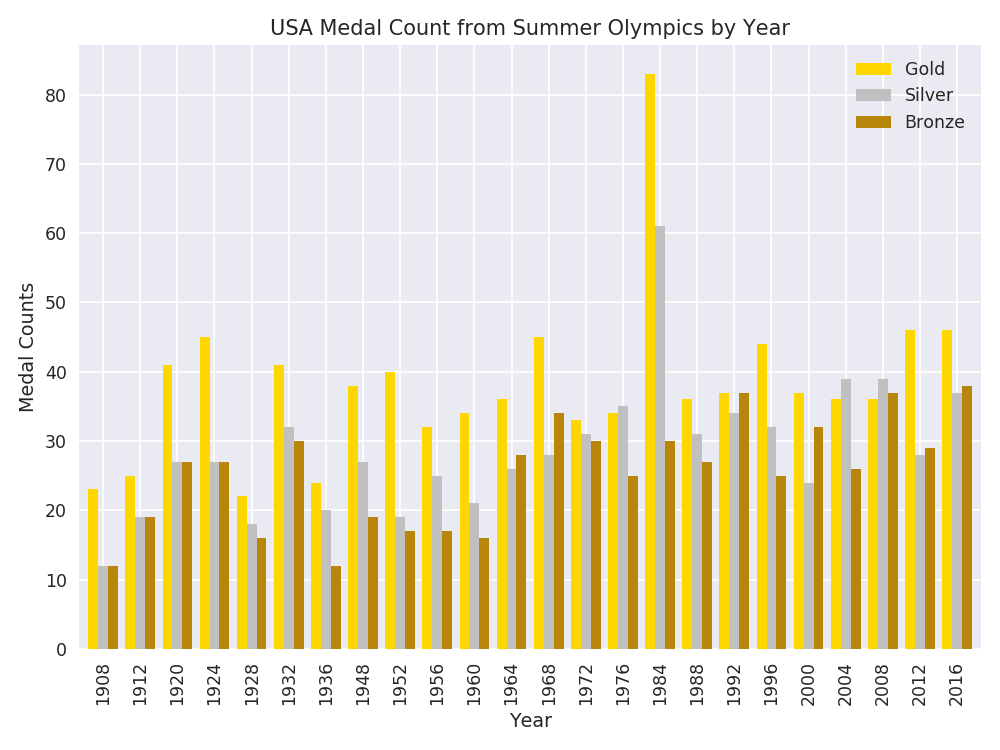

In [95]:
# Create Figure to visualize the MI's medal counts from Winter Olympics
fig5 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [96]:
plt.clf()

USA_year_summer.plot(kind='bar',y = ['Gold', 'Silver', 'Bronze'],ax= plt.gca(), width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
#MI_sumoly_sport.reindex(['Gold'], level='Medal').unstack().plot(y =['Gold'], ax= plt.gca(), color = 'gold')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Medal Counts')
plt.title('USA Medal Count from Summer Olympics by Year')

fig5.tight_layout()

### Figure 6: To Visualize the USA Medal Counts from Winter Olympics by Year

<IPython.core.display.Javascript object>


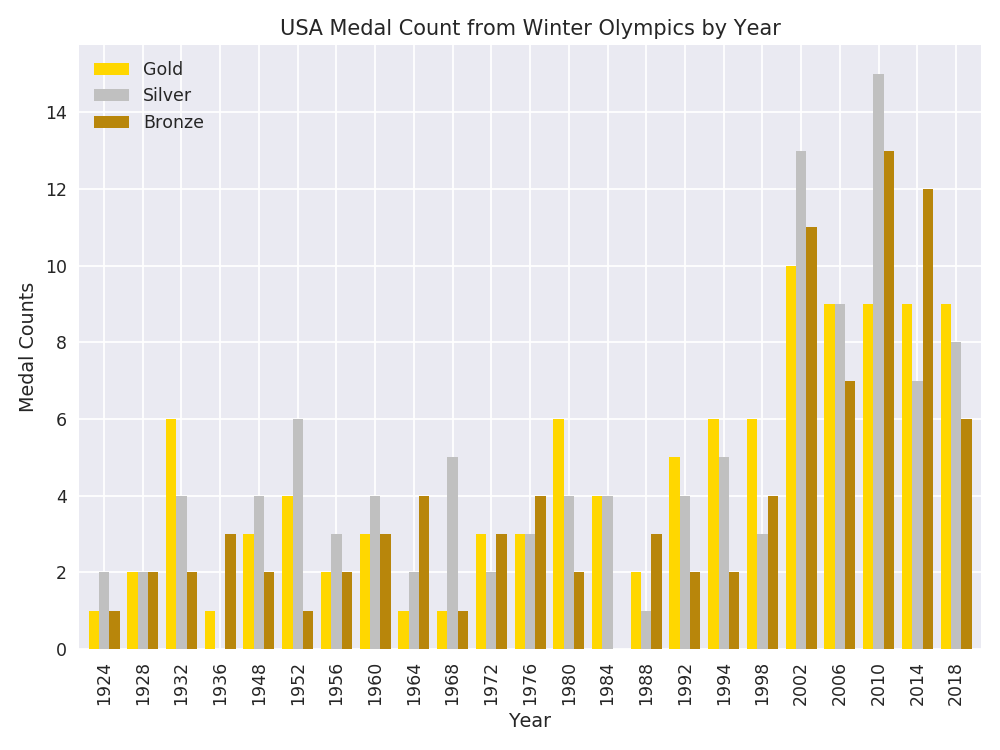

In [97]:
# Create Figure to visualize the MI's medal counts from Winter Olympics
fig6 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [98]:
plt.clf()

USA_year_winter.plot(kind='bar',y = ['Gold', 'Silver', 'Bronze'],ax= plt.gca(), width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
#MI_sumoly_sport.reindex(['Gold'], level='Medal').unstack().plot(y =['Gold'], ax= plt.gca(), color = 'gold')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Medal Counts')
plt.title('USA Medal Count from Winter Olympics by Year')

fig6.tight_layout()

### Figure 7: Average State Medal Count vs Michigan Medal Count (Summer Olympics by Games)

<IPython.core.display.Javascript object>


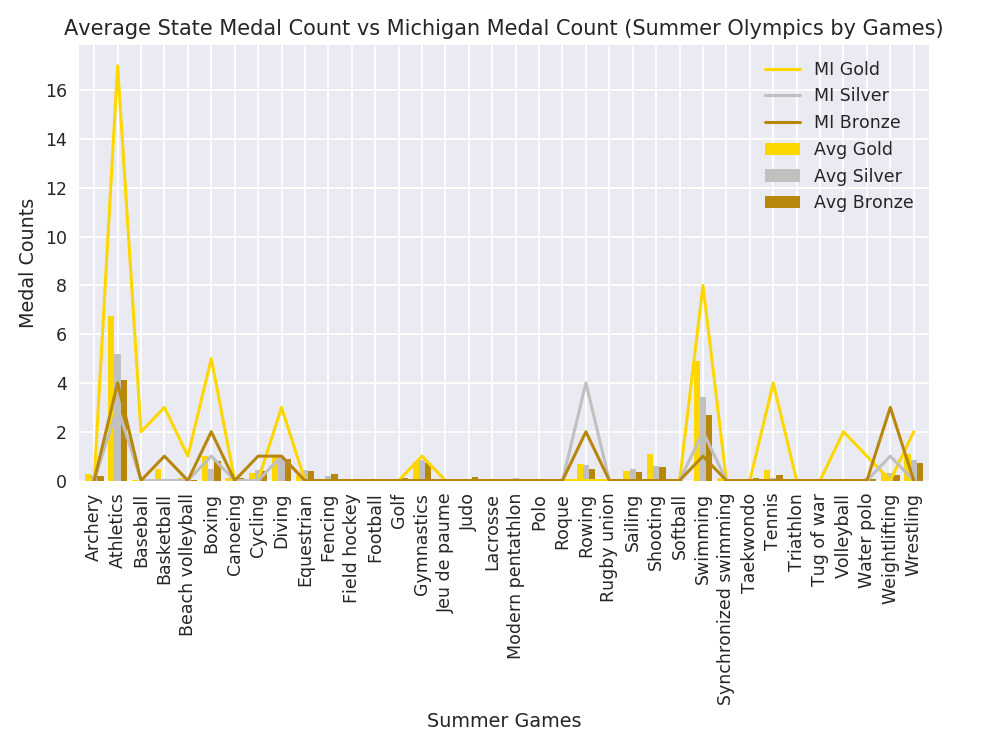

In [99]:
# Create Figure to visualize the MI's medal counts from Summer Olympics
fig7 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [100]:
plt.clf()
MI_sumoly_sport_full.plot(y =['Gold'], ax= plt.gca(), color = 'gold')
MI_sumoly_sport_full.plot(y =['Silver'], ax= plt.gca(), color = 'silver')
MI_sumoly_sport_full.plot(y =['Bronze'], ax= plt.gca(), color = 'darkgoldenrod')
USA_sport_summer_avg.plot(y =['Gold','Silver', 'Bronze'],kind='bar', ax= plt.gca(),width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.gca().legend(['MI Gold', 'MI Silver', 'MI Bronze','Avg Gold', 'Avg Silver', 'Avg Bronze'])
plt.xticks(rotation=90)
plt.xlabel('Summer Games')
plt.ylabel('Medal Counts')
plt.title('Average State Medal Count vs Michigan Medal Count (Summer Olympics by Games)')
fig7.tight_layout()

### Figure 8: Average State Medal Count vs Michigan Medal Count (Winter Olympics by Games)

<IPython.core.display.Javascript object>


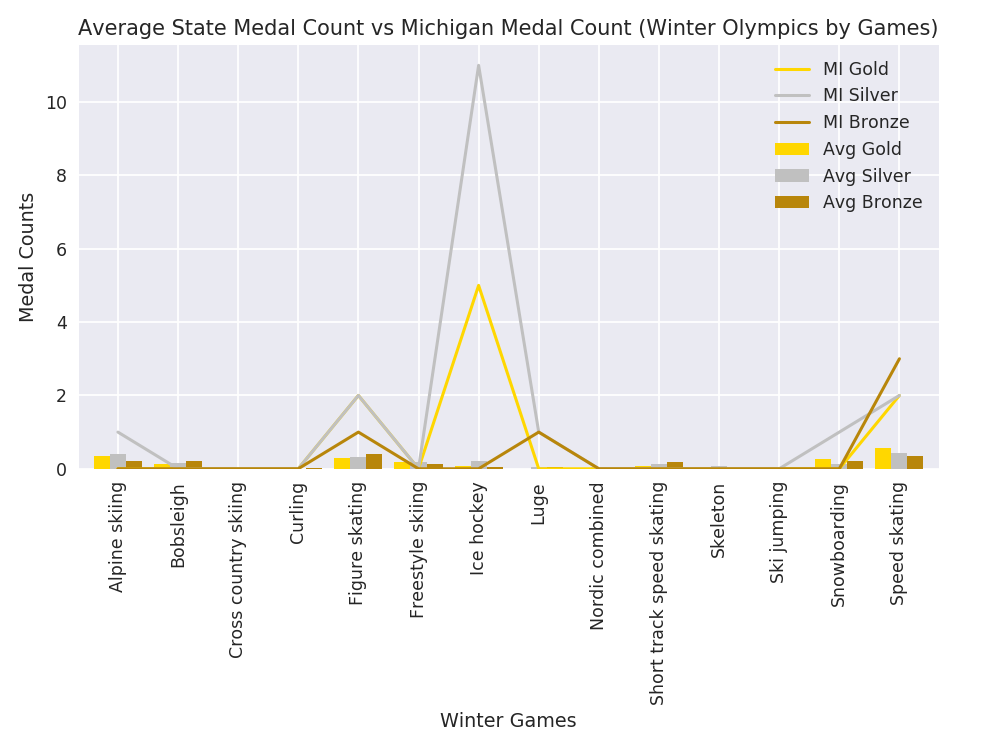

In [101]:
# Create Figure to visualize the MI's medal counts from Summer Olympics
fig8 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [102]:
plt.clf()
MI_winoly_sport_full.plot(y =['Gold'], ax= plt.gca(), color = 'gold')
MI_winoly_sport_full.plot(y =['Silver'], ax= plt.gca(), color = 'silver')
MI_winoly_sport_full.plot(y =['Bronze'], ax= plt.gca(), color = 'darkgoldenrod')
USA_sport_winter_avg.plot(y =['Gold','Silver', 'Bronze'],kind='bar', ax= plt.gca(),width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.gca().legend(['MI Gold', 'MI Silver', 'MI Bronze','Avg Gold', 'Avg Silver', 'Avg Bronze'])
plt.xticks(rotation=90)
plt.xlabel('Winter Games')
plt.ylabel('Medal Counts')
plt.title('Average State Medal Count vs Michigan Medal Count (Winter Olympics by Games)')
fig8.tight_layout()

### Figure 9: Average State Medal Count vs Michigan Medal Count (Summer Olympics by Year)

#### Interactive plot

Click on the plot to see the total number of medals won by USA for the year on which mouse button is pressed

<IPython.core.display.Javascript object>


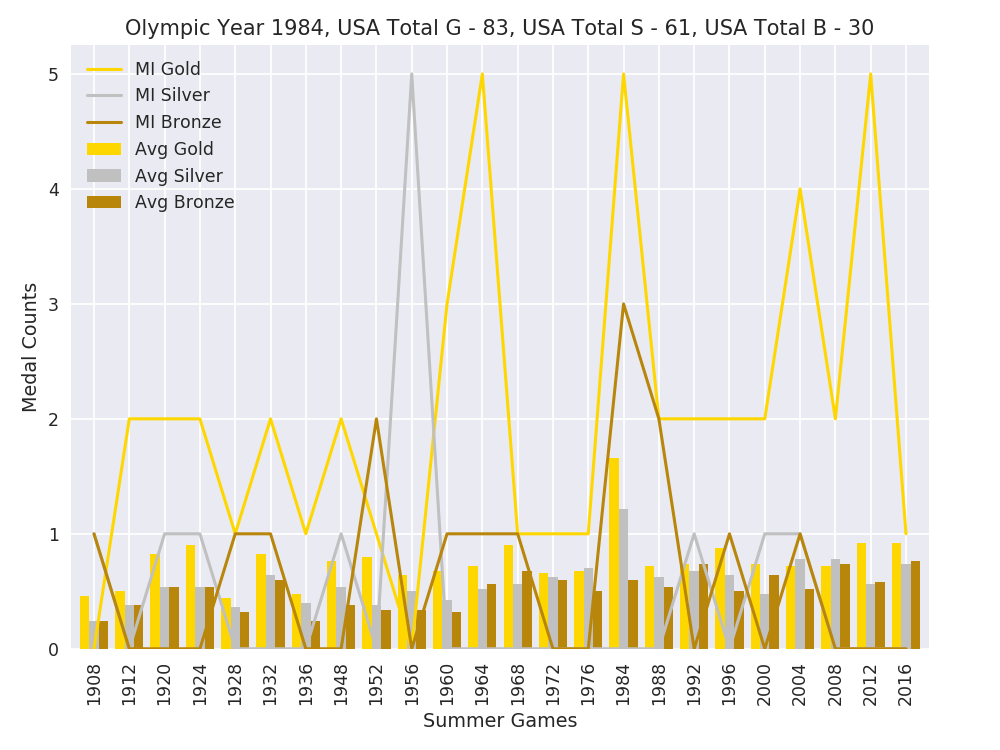

In [103]:
# Create Figure to visualize the MI's medal counts from Summer Olympics
fig9 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [104]:
plt.clf()
MI_sumoly_year.unstack(fill_value=0).plot(y =['Gold'], ax= plt.gca(), color = 'gold')
MI_sumoly_year.unstack(fill_value=0).plot(y =['Silver'], ax= plt.gca(), color = 'silver')
MI_sumoly_year.unstack(fill_value=0).plot(y =['Bronze'], ax= plt.gca(), color = 'darkgoldenrod')
USA_year_summer_avg.plot(y =['Gold','Silver', 'Bronze'],kind='bar', ax= plt.gca(),width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.gca().legend(['MI Gold', 'MI Silver', 'MI Bronze','Avg Gold', 'Avg Silver', 'Avg Bronze'])
plt.xticks(rotation=90)
plt.xlabel('Summer Games')
plt.ylabel('Medal Counts')
plt.title('Average State Medal Count vs Michigan Medal Count (Summer Olympics by Games)')
fig9.tight_layout()

In [105]:
def onclick(event):
    x_val = event.xdata
    oly_year = plt.gca().get_xticklabels()[int(x_val +1)].get_text()
    
    # Calculate the total number of medal for USA for the year on which the button_press_event occurred
    USA_Gold = int(USA_year_summer_avg.loc[oly_year]['Gold'] * 50)
    USA_Silver = int(USA_year_summer_avg.loc[oly_year]['Silver'] * 50)
    USA_Bronze = int(USA_year_summer_avg.loc[oly_year]['Bronze'] * 50)
    
    # Show the total medal count for the x axis on which the event was triggered in the title
    plt.gca().set_title('Olympic Year {}, USA Total G - {}, USA Total S - {}, USA Total B - {}'.format(oly_year, 
            USA_Gold, USA_Silver, USA_Bronze))

# Tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

### Figure 10: Average State Medal Count vs Michigan Medal Count (Winter Olympics by Year)

#### Interactive plot

Click on the plot to see the total number of medals won by USA for the year on which mouse button is pressed

<IPython.core.display.Javascript object>


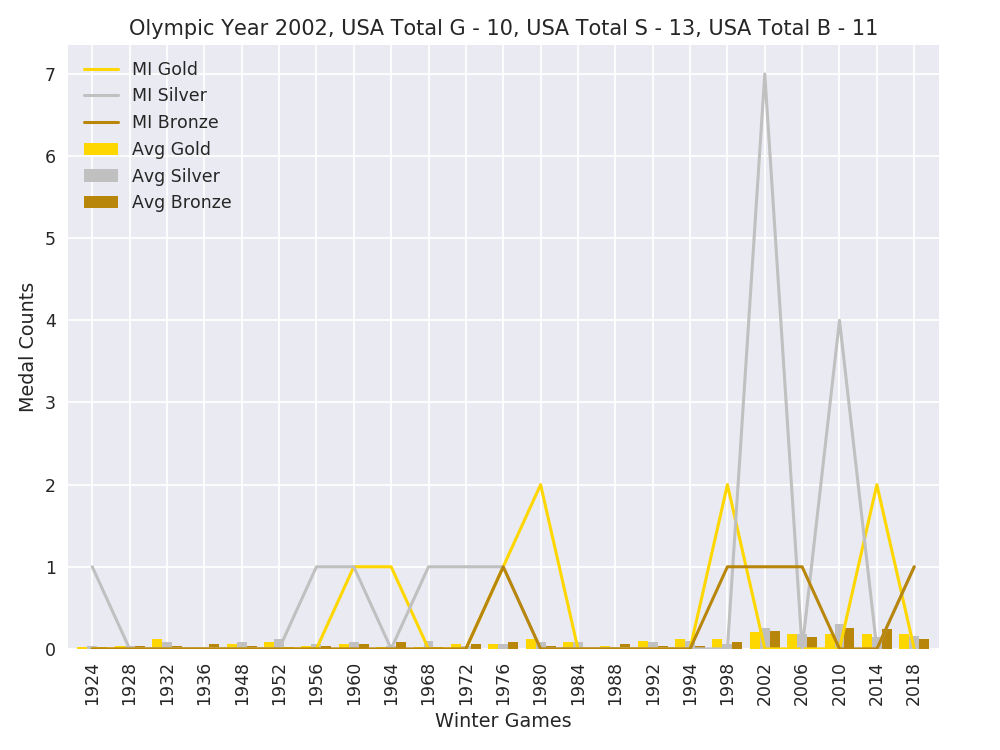

In [106]:
# Create Figure to visualize the MI's medal counts from Summer Olympics
fig10 = plt.figure(figsize = (8,6))
plt.subplot(111)
plt.style.use('seaborn')

In [107]:
plt.clf()
MI_winoly_year_full.plot(y =['Gold'], ax= plt.gca(), color = 'gold', picker =4)
MI_winoly_year_full.plot(y =['Silver'], ax= plt.gca(), color = 'silver', picker =4)
MI_winoly_year_full.plot(y =['Bronze'], ax= plt.gca(), color = 'darkgoldenrod', picker =4)
USA_year_winter_avg.plot(y =['Gold','Silver', 'Bronze'],kind='bar', ax= plt.gca(),width = 0.8,color = ['gold', 'silver', 'darkgoldenrod'])
plt.gca().legend(['MI Gold', 'MI Silver', 'MI Bronze','Avg Gold', 'Avg Silver', 'Avg Bronze'])
plt.xticks(rotation=90)
plt.xlabel('Winter Games')
plt.ylabel('Medal Counts')
plt.title('Average State Medal Count vs Michigan Medal Count (Winter Olympics by Games)')
fig10.tight_layout()

In [108]:
def onclick(event):
    x_val = event.xdata
    oly_year = plt.gca().get_xticklabels()[int(x_val +1)].get_text()
    
    # Calculate the total number of medal for USA for the year on which the button_press_event occurred
    USA_Gold = int(USA_year_winter_avg.loc[oly_year]['Gold'] * 50)
    USA_Silver = int(USA_year_winter_avg.loc[oly_year]['Silver'] * 50)
    USA_Bronze = int(USA_year_winter_avg.loc[oly_year]['Bronze'] * 50)
    
    # Show the total medal count for the x axis on which the event was triggered in the title
    plt.gca().set_title('Olympic Year {}, USA Total G - {}, USA Total S - {}, USA Total B - {}'.format(oly_year, 
            USA_Gold, USA_Silver, USA_Bronze))

# Tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

# Inferences
- Michigan did significantly well compared to average USA state in both Summer and Winter Olympics
- Michigan state performed very well in atheletics, swimming and boxing in the Summer games
- Michigan state performed very well in Ice Hockey and speed skating in WWinter games
- Both USA as a whole and michigan as a state improved their medal tallies in the last three decades